# Jupyter Notebook  problems in the Essentials of Paleomagnetism Textbook by L. Tauxe

## Problems in Chapter 16

First let's set things up for business. 

In [10]:
import pmagpy.ipmag as ipmag
import pmagpy.pmag as pmag
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline


## Problem 1a

We need to use the function **pmag.bc02** to calculate the expected direction for the Mojave Desert (34.5N,117W).  So let's remind ourselves about how it works.  

In [55]:
help(pmag.apwp)

Help on function apwp in module pmagpy.pmag:

apwp(data, print_results=False)
    calculates expected pole positions and directions for given plate, location and age
    Parameters 
    _________
        data : [plate,lat,lon,age]
        print_results : if True will print out nicely formatted results
    Returns
    _________
        if print_results is False, [Age,Paleolat, Dec, Inc, Pole_lat, Pole_lon]



Don't forget the minus sign on the longitude! 

In [57]:
data=['NA',34.5,-117.5,20]
pmag.apwp(data,print_results=True)

 Age   Paleolat.   Dec.   Inc.   Pole_lat.  Pole_Long.
   20.0    34.7   349.2    54.1    81.1    156.7



## Problem 1b

I went to http://earthref.org/MagIC/search and filled in the search criteria as requested and downloaded a file in  a Project Directory called 'MojaveDesert'.  Now we can unpack it with **ipmag.download_magic** as we did in Chapter_15.   

In [9]:
help(ipmag.download_magic)

Help on function download_magic in module pmagpy.ipmag:

download_magic(infile, dir_path='.', input_dir_path='.', overwrite=False, print_progress=True, data_model=3.0, separate_locs=False)
    takes the name of a text file downloaded from the MagIC database and
    unpacks it into magic-formatted files. by default, download_magic assumes
    that you are doing everything in your current directory. if not, you may
    provide optional arguments dir_path (where you want the results to go) and
    input_dir_path (where the downloaded file is).
    
    Parameters
    ----------
    infile : str
        MagIC-format file to unpack
    dir_path : str
        output directory (default ".")
    input_dir : str
        input directory (default ".")
    overwrite: bool
        overwrite current directory (default False)
    print_progress: bool
        verbose output (default True)
    data_model : float
        MagIC data model 2.5 or 3 (default 3)
    separate_locs : bool
        create a sep

In [15]:
ipmag.download_magic('magic_downloaded_rows.txt',input_dir_path='Chapter_16/Problem_1',\
                    dir_path='Chapter_16/Problem_1')

working on:  'contribution'
1  records written to file  Chapter_16/Problem_1/contribution.txt
contribution  data put in  Chapter_16/Problem_1/contribution.txt
working on:  'locations'
25  records written to file  Chapter_16/Problem_1/locations.txt
locations  data put in  Chapter_16/Problem_1/locations.txt


True

## Problem 1c

We are asked to make an equal area plot of all the Miocene poles, so we will have to read the data in plot  those.  

I know by now (and also by reading the information on the MagIC database in the PmagPy cookbook (http://earthref.org/PmagPy/cookbook) and in the data model link on the MagIC website that the locations.txt tables are tab delimited with column headers on the second line.  So, I'll read in the sites table into a Pandas DataFrame and wrangle that. 

In [23]:
file='Chapter_16/Problem_1/locations.txt' # make a filename
alldata=pd.read_csv(file,sep='\t',header=1)
alldata.columns

Index(['age_high', 'age_low', 'age_unit', 'citations', 'conglomerate_test',
       'contact_test', 'continent_ocean', 'country', 'description',
       'dir_alpha95', 'dir_dec', 'dir_inc', 'dir_k', 'dir_k_ratio',
       'dir_n_samples', 'dir_n_sites', 'dir_polarity', 'dir_tilt_correction',
       'fold_test', 'fold_test_significance', 'geologic_classes',
       'geological_province_sections', 'lat_n', 'lat_s', 'lithologies',
       'location', 'location_type', 'lon_e', 'lon_w', 'method_codes',
       'pole_antipodal_angle', 'pole_comp_name', 'pole_dm', 'pole_dp',
       'pole_lat', 'pole_lon', 'pole_reversed_perc', 'region', 'result_name',
       'result_type', 'reversal_test', 'rock_magnetic_test'],
      dtype='object')

In [19]:
alldata.dir_tilt_correction

0     100.0
1       0.0
2     100.0
3     100.0
4       0.0
5     100.0
6     100.0
7     100.0
8       NaN
9     100.0
10      0.0
11    100.0
12    100.0
13    100.0
14      0.0
15    100.0
16    100.0
17      NaN
18    100.0
19    100.0
20    100.0
21      0.0
22    100.0
23    100.0
24    100.0
Name: dir_tilt_correction, dtype: float64

Looks like we have some filtering to do.  First, we should use only the tilt corrected data (dir_tilt_correction=100). 

In [20]:
data=alldata[alldata.dir_tilt_correction==100]

And we should verify that the data fall within our bounds:

In [24]:
print (data.lat_s.min(),data.lat_n.max(),data.lon_w.min(),data.lon_e.max())
print (data.age_low.min(),data.age_high.max())

34.8 35.5 241.2 244.0
9.0 27.0


Checks out.  So, let's plot it up 

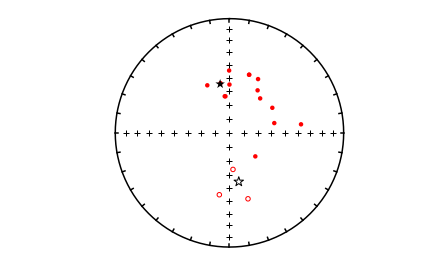

In [28]:
ipmag.plot_net(1) # make an equal angle net
ipmag.plot_di(data.dir_dec.values,data.dir_inc.values,color='red')
ipmag.plot_di(ExpDec,ExpInc,color='black',marker='*',markersize=100)# put on the Expected normal direction
ipmag.plot_di((ExpDec-180)%360,-ExpInc,color='black',marker='*',markersize=100)

Wow - that looks weird - so I'm going to plot these in 5 Ma age groups. So let's look at the ages

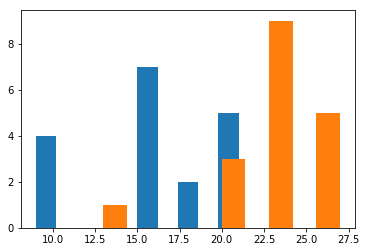

In [29]:
plt.hist(data.age_low)
plt.hist(data.age_high);

In [30]:
young=data[data.age_low<15]
mid=data[(data.age_low>=15)&(data.age_low<20)]
old=data[(data.age_low>=20) & (data.age_low<25)]

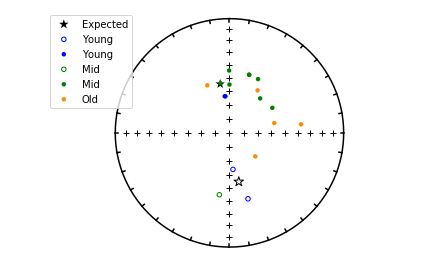

In [31]:
ipmag.plot_net(1) # make an equal angle net
ipmag.plot_di(ExpDec,ExpInc,color='black',marker='*',markersize=100,legend='yes',label='Expected')# put on the Expected normal direction
ipmag.plot_di((ExpDec-180)%360,-ExpInc,color='black',marker='*',markersize=100)
ipmag.plot_di(young.dir_dec.values,young.dir_inc.values,color='blue',legend='yes',label='Young') 
ipmag.plot_di(mid.dir_dec.values,mid.dir_inc.values,color='green',legend='yes',label='Mid') 
ipmag.plot_di(old.dir_dec.values,old.dir_inc.values,color='darkorange',legend='yes',label='Old') 


So... between ~15 to 25 Ma there must have been some rotation going on.  But not everywhere!  In the Chapter, there is a discussion about 'displaced terranes'.  Perhaps the Mojave is one of those.  At least it appears to have undergone significant vertical axis rotation!  Or got hit by lightning or something...

## Problem 2:

Site 522 was drilled on the African plate and ranged in age from 23 to 35 Ma (or so).  So I should use **pmag.apwp**

In [58]:
data=['AF',-26,-5,33]
pmag.apwp(data,print_results=True)

 Age   Paleolat.   Dec.   Inc.   Pole_lat.  Pole_Long.
   33.0   -35.6   353.7   -55.1    78.9    202.9



In [59]:
data=['AF',-26,-5,23]
pmag.apwp(data,print_results=True)

 Age   Paleolat.   Dec.   Inc.   Pole_lat.  Pole_Long.
   23.0   -33.3     0.1   -52.7    82.7    174.6



We'll have to read the data for Chapter 15, Problem 1 in here, assuming they've been unpacked (again - see solutions to Chapter 15), and calculate averages at the top and the bottom.

In [60]:
specimens=pd.read_csv('Chapter_15/Problem_1/specimens.txt',sep='\t',header=1)
specimens=specimens.dropna(subset=['analysts']) # kill unwanted lines with duplicate or irrelevent info
specimens['site']=specimens['specimen'] # make a column with site name
sites=pd.read_csv('Chapter_15/Problem_1/sites.txt',sep='\t',header=1)
data=pd.merge(specimens,sites,on='site') # merge the two data frames on site


MaxDepth=data.core_depth.max()
MinDepth=data.core_depth.min()
print (MaxDepth,MinDepth)

146.7 55.23


I want to take the top and bottom 10 meters.  

In [44]:
TopIncs=data[data.core_depth<65].dir_inc.values
BottomIncs=data[data.core_depth>136].dir_inc.values
print ('Top 10 m average inclination: ',pmag.doincfish(TopIncs))
print ('Bottom 10 m average inclination: ',pmag.doincfish(BottomIncs))

Top 10 m average inclination:  {'n': 276, 'ginc': 50.44166666666662, 'inc': 51.971666666666522, 'r': 265.08627542044349, 'k': 25.197630560984411, 'alpha95': 0.99944043396377436, 'csd': 16.136344856646417}
Bottom 10 m average inclination:  {'n': 279, 'ginc': 54.244802867383484, 'inc': 59.254802867383177, 'r': 252.07921893718697, 'k': 10.326594884128928, 'alpha95': 0.9958058147194363, 'csd': 25.206146086833229}


Wow.  These data (50 and 54 respectively) match really well with the Besse and Courtillot (2002) predictions of 53 and 55 respectively.   In fact, they used the Site 522 data to help make their APWPs! 

## Problem 3a:

I looked up in the Appendix and found the rotation pole for North America to South Africa at 90 Ma to be $\lambda$=74.6, $\phi$=-23, and $\Omega$  = 33.8.   And we were told the North American pole to rotate:  $\lambda=75.2^{\circ}, \phi=201^{\circ}$. 

In [11]:
import pmagpy.frp as frp
help(frp.get_pole)

Help on function get_pole in module pmagpy.frp:

get_pole(continent, age)
    returns rotation poles and angles for specified continents and ages
    assumes fixed Africa.  
    Parameters
    __________
        continent : 
            aus : Australia
            eur : Eurasia
            mad : Madacascar
            [nwaf,congo] : NW Africa  [choose one]
            col :  Colombia
            grn : Greenland
            nam : North America
            par : Paraguay
            eant :  East Antarctica
            ind : India
            [neaf,kala] : NE Africa [choose one]
            [sac,sam] :  South America [choose one]
            ib : Iberia
            saf : South Africa
      Returns
      _______
          [pole longitude, pole latitude, rotation angle] : for the continent at specified age



In [47]:
Prot=frp.get_pole('nam',90)

[74.6, -23.0, 33.8]


In [50]:
Prot=[74.6,-23,33.8] # finite pole of rotation
plat,plon=75.2,201

Now for the **pmag.pt_rot** bit.  

In [51]:
help(pmag.pt_rot)

Help on function pt_rot in module pmagpy.pmag:

pt_rot(EP, Lats, Lons)
    Rotates points on a globe by an Euler pole rotation using method of
    Cox and Hart 1986, box 7-3.
    
    Parameters
    ----------
    EP : Euler pole list [lat,lon,angle]
    Lats : list of latitudes of points to be rotated
    Lons : list of longitudes of points to be rotated
    
    Returns
    _________
    RLats : rotated latitudes
    RLons : rotated longitudes



In [52]:
print (pmag.pt_rot(Prot,[plat],[plon]))

([67.092529767349802], [244.36711746757442])


The African pole is $\lambda=66.8^{\circ}, \phi=244.5^{\circ}$, and we got 67.1$^{\circ}$ and 244.4$^{\circ}$.  Hot diggety dog.  (Now you know how old I am.)

## Problem 4a:

I went to the MagIC search engine  and downloaded late Cretaceous data from Europe  as instructed in the book.  I saved both the sites and the locations tables.  Now I'll unpack the data files with **ipmag.download_magic**

In [2]:
ipmag.download_magic('magic_downloaded_rows.txt',dir_path='Chapter_16/Problem_4',\
                     input_dir_path='Chapter_16/Problem_4')

working on:  'contribution'
1  records written to file  Chapter_16/Problem_4/contribution.txt
contribution  data put in  Chapter_16/Problem_4/contribution.txt
working on:  'locations'
220  records written to file  Chapter_16/Problem_4/locations.txt
locations  data put in  Chapter_16/Problem_4/locations.txt


True

So, let's take a look at what we have by reading the location.txt file into a Pandas DataFrame and finding the method codes available. 

In [2]:
poles=pd.read_csv('Chapter_16/Problem_4/locations.txt',sep='\t',header=1)
poles.method_codes.unique()


array(['DE-DI:LT-AF-Z:LP-DC2', 'DE-DI:LT-AF-Z:LT-T-Z:LP-DC4',
       'DE-DI:LT-AF-Z:LT-T-Z:LP-DC3', 'DE-DI:LT-T-Z:LP-DC4',
       'DE-DI:LT-AF-Z:LP-DC3', 'DE-DI:LT-T-Z:LP-DC3',
       'DE-DI:LT-AF-Z:LT-T-Z:LP-DC2', 'DE-DI:LT-NO:LP-DC1',
       'DE-DI:LT-T-Z:LP-DC2', 'DE-DI:LT-CHEM:LT-T-Z:LP-DC3',
       'DE-DI:LT-AF-Z:LT-T-Z:LP-DC5', 'DE-VGP:FS-H:LT-AF-Z:SO-NO:LP-DC3',
       'DE-DI:FS-H:LT-AF-Z:SO-NO:LP-DC3', 'DE-DI:LT-T-Z:LT-T-Z:LP-DC4',
       'DE-DI:LT-NO:LP-DC0'], dtype=object)

Now let's fish out the "best" poles with LP-DC4 or LP-DC5. 

In [3]:
dc4=poles[poles.method_codes.str.contains('DC4')]
dc5=poles[poles.method_codes.str.contains('DC5')]
best_poles=pd.concat([dc4,dc5])

## Problem 4b:

Some of the data were included in other results, were overprints, or were otherwise superceded.  These details are in a comment field called description.  So let's read these descriptions and figure out how to eliminate the ones we don't want. 

In [4]:
for ind in best_poles.index:
    print (ind, best_poles.loc[ind].description)

1 Upper Hauterivian to Albian. Extent Thickness 117m. Thermal to 575C, AF to 100mT, characteristic component.
2 Upper Hauterivian to Albian. Extent Thickness 117m. Thermal to 575C, AF to 100mT, characteristic component.
3 Upper Hauterivian to Albian. Extent Thickness 117m. Thermal to 575C, AF to 100mT, characteristic component.
4 Upper Hauterivian to Albian. Extent Thickness 117m. Thermal to 575C, AF to 100mT, characteristic component.
5 Neocomian to Aptian age?. AF to 100mT, thermal to 300C, characteristic component. Secondary magnetization mid-Tertiary?.
6 Neocomian to Aptian age?. AF to 100mT, thermal to 300C, characteristic component. Secondary magnetization mid-Tertiary?.
14 Aptian to Albian. Thermal to 500C, characteristic component 250-500C. IRM (sat. 0. 4T) ; HYST.
15 Aptian to Albian. Thermal to 500C, characteristic component 250-500C. IRM (sat. 0. 4T) ; HYST.
16 Berriasian to Barremian. Group 1. Thermal to 500C, characteristic component 250-500C. IRM (sat. 0. 4T) ; HYST. Rema

Now we want to thumb through the  descriptions and eliminate the kind we don't want.  For example, if we make a list of unwanted descriptors (verprint, emagneti, uperseded, Data incl. in RESULTNOS), from the above list,  we can eliminate those. 

In [5]:
Unwanted=['verprint','econdary','emagneti','uperseded','Data incl. in RESULT'] # verprint includes both Overprint and overprint
# make a column for "Use" in best_poles and set to True
best_poles['Use']=True
# now go through and flag the bad boys
for deleteme in Unwanted:
    best_poles.loc[best_poles.description.str.contains(deleteme),'Use']='False'
selected_poles=best_poles[best_poles.Use==True]
for ind in selected_poles.index:
    print (ind, selected_poles.loc[ind].description)



1 Upper Hauterivian to Albian. Extent Thickness 117m. Thermal to 575C, AF to 100mT, characteristic component.
2 Upper Hauterivian to Albian. Extent Thickness 117m. Thermal to 575C, AF to 100mT, characteristic component.
3 Upper Hauterivian to Albian. Extent Thickness 117m. Thermal to 575C, AF to 100mT, characteristic component.
4 Upper Hauterivian to Albian. Extent Thickness 117m. Thermal to 575C, AF to 100mT, characteristic component.
14 Aptian to Albian. Thermal to 500C, characteristic component 250-500C. IRM (sat. 0. 4T) ; HYST.
15 Aptian to Albian. Thermal to 500C, characteristic component 250-500C. IRM (sat. 0. 4T) ; HYST.
24 AF to 60mT, thermal to 550C, characteristic component.
25 AF to 60mT, thermal to 550C, characteristic component.
26 Pliensbachian to Callovian age. Thermal to 650C. Js-T (CT 100, 650C) , OP (GOETH, HEM, MAGN) , SUSC, AN. Late Cretaceous magnetization.
27 Pliensbachian to Callovian age. Thermal to 650C. Js-T (CT 100, 650C) , OP (GOETH, HEM, MAGN) , SUSC, AN. L

Here's a list of all the locations we have

In [6]:
selected_poles.location

1                                       Cismon Section
2                                       Cismon Section
3                                       Cismon Section
4                                       Cismon Section
14                     Organya Aptian-Albian Sediments
15                     Organya Aptian-Albian Sediments
24                         Lower Cretaceous Limestones
25                         Lower Cretaceous Limestones
26                        Bulgarian Jurassic Sediments
27                        Bulgarian Jurassic Sediments
28                        Bulgarian Jurassic Sediments
41                     Scaglia Formation, Marsica Area
42                     Scaglia Formation, Marsica Area
43                                       Scaglia Rossa
44                                       Scaglia Rossa
45                                       Scaglia Rossa
46                                       Scaglia Rossa
58                                 Lower Scaglia Rossa
59        

Oops.  Looks like we have a lot of duplicates in our 'selected' pole list.  So to verify, let's look at the latitudes and longitudes: 


In [7]:
selected_poles[['pole_lat','pole_lon']]

,pole_lat,pole_lon
1,44.2,257.3
2,44.2,257.3
3,44.2,257.3
4,44.2,257.3
14,77.1,233.9
15,77.1,233.9
24,70.0,192.0
25,70.0,192.0
26,77.0,313.0
27,77.0,313.0


And yeah, there are a lot of duplicates.  So we want a unique list of poles.  I can use the Pandas drop_duplicates function!

In [8]:
selected_poles=selected_poles.drop_duplicates(['pole_lat','pole_lon'])
selected_poles[['pole_lat','pole_lon']]

,pole_lat,pole_lon
1,44.2,257.3
14,77.1,233.9
24,70.0,192.0
26,77.0,313.0
41,73.0,203.0
43,63.4,220.2
58,49.5,271.1
84,85.1,242.1
139,86.9,164.7
142,72.8,128.1


Now we have a pared down list of poles.  

## Problem 4c:

We have to use the functions **frp.get_pole** and **pmag.pt_rot** as in Problem 3.  

In [12]:
help(frp.get_pole)

Help on function get_pole in module pmagpy.frp:

get_pole(continent, age)
    returns rotation poles and angles for specified continents and ages
    assumes fixed Africa.  
    Parameters
    __________
        continent : 
            aus : Australia
            eur : Eurasia
            mad : Madacascar
            [nwaf,congo] : NW Africa  [choose one]
            col :  Colombia
            grn : Greenland
            nam : North America
            par : Paraguay
            eant :  East Antarctica
            ind : India
            [neaf,kala] : NE Africa [choose one]
            [sac,sam] :  South America [choose one]
            ib : Iberia
            saf : South Africa
      Returns
      _______
          [pole longitude, pole latitude, rotation angle] : for the continent at specified age



In [13]:
Prot_eur_af=frp.get_pole('eur',100)
Prot_nam_af=frp.get_pole('nam',100)
print (Prot_eur_af,Prot_nam_af)

[40.2, -12.5, 28.5] [70.0, -24.0, 40.2]


In [14]:
help(pmag.pt_rot)

Help on function pt_rot in module pmagpy.pmag:

pt_rot(EP, Lats, Lons)
    Rotates points on a globe by an Euler pole rotation using method of
    Cox and Hart 1986, box 7-3.
    
    Parameters
    ----------
    EP : Euler pole list [lat,lon,angle]
    Lats : list of latitudes of points to be rotated
    Lons : list of longitudes of points to be rotated
    
    Returns
    _________
    RLats : rotated latitudes
    RLons : rotated longitudes



In [15]:
lats=selected_poles.pole_lat.values # array of pole latitudes for Europe
lons=selected_poles.pole_lon.values # same for longitudes
RLats_rot2af,RLons_rot2af=pmag.pt_rot(Prot_eur_af,lats,lons) # rotate to fixed Africa
Prot_af_nam=Prot_nam_af[:] # make a copy
Prot_af_nam[2]=-Prot_af_nam[2] # quick change of rotation sense (from AF to NAM)
#rotate to North America
RLats_rot2nam,RLons_rot2nam=pmag.pt_rot(Prot_af_nam,RLats_rot2af,RLons_rot2af)

We can plot that file using **ipmag.plot_vgp** function (similar to in Chapter 14).  So, we need to import the Basemap function from mpl_toolkits (you might have to install this).

Now we need to do two things:  1) read in the file _selected_poles.rot_ and 2) figure out what the pole for North America was.  First the latter.  I can use the program apwp.py for this, but I have to put in dummy lat and lon keys and ignore the Paleolat, Dec, Inc output and zoom in on the Pole_lat Pole_long output. 

In [16]:
help(pmag.apwp)

Help on function apwp in module pmagpy.pmag:

apwp(data, print_results=False)
    calculates expected pole positions and directions for given plate, location and age
    Parameters
    _________
        data : [plate,lat,lon,age]
            plate : [NA, SA, AF, IN, EU, AU, ANT, GL] 
                NA : North America
                SA : South America
                AF : Africa  
                IN : India
                EU : Eurasia
                AU : Australia 
                ANT: Antarctica 
                GL : Greenland
             lat/lon : latitude/longitude in degrees N/E
             age : age in millions of years
        print_results : if True will print out nicely formatted results
    Returns
    _________
        if print_results is False, [Age,Paleolat, Dec, Inc, Pole_lat, Pole_lon]



In [17]:
pole_stuff=pmag.apwp(['NA',33,-117,100])
NApole_lat,NApole_lon=pole_stuff[4],pole_stuff[5]
print (NApole_lat,NApole_lon)

81.53 198.27


So the North American pole was 81.5N/198.3E at 100 Ma.

And we plot the stuff. Here are examples from the (old, deprecated) basemap way and the new cartopy way:  

In [18]:
has_basemap, Basemap = pmag.import_basemap()
has_cartopy, Cartopy = pmag.import_cartopy()


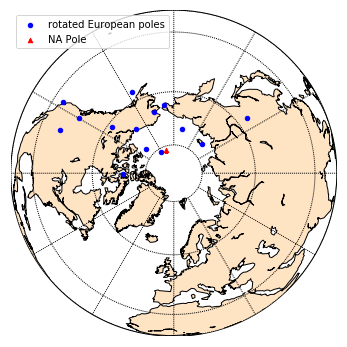

In [83]:
if not has_basemap:
    print('You will need to correctly install basemap in order to continue this cell')
else:
    m=Basemap(projection='ortho',lat_0=90,lon_0=0,resolution='c')
    plt.figure(num=3,figsize=(6,6))
    m.drawcoastlines()
    m.fillcontinents(color='bisque')
    m.drawmeridians(np.arange(0,360,30))
    m.drawparallels(np.arange(-60,90,30))
    ipmag.plot_vgp(m,RLons_rot2nam,RLats_rot2nam,\
               color='b',label='rotated European poles',legend='yes')
    ipmag.plot_vgp(m,[NApole_lon],[NApole_lat], color='r',\
               label='NA Pole',marker='^',legend='yes')

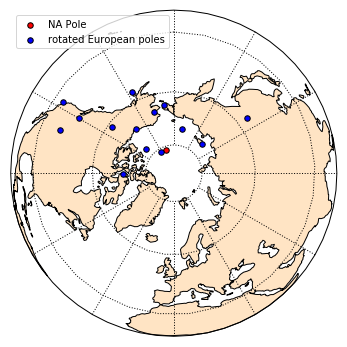

In [35]:
if not has_cartopy:
    print('You will need to correctly install cartopy in order to continue this cell')
else:
    map_axis =ipmag.make_orthographic_map(central_latitude=90,central_longitude=0,figsize=(6,6),land_color='bisque')
    ipmag.plot_vgp(map_axis, vgp_lon=[NApole_lon], vgp_lat= [NApole_lat]    ,color='red',\
                   markersize=30, legend=True,label='NA Pole')   
    ipmag.plot_vgp(map_axis, vgp_lon=RLons_rot2nam, vgp_lat= RLats_rot2nam   , color='blue',\
                   markersize=30, legend=True,label='rotated European poles')  


Boy that is super crappy agreement!  The European poles are pretty scattered and a lot are 'far sided'.  A lot of them are sediments.  I wonder whether we have an 'inclination shallowing' problem.  You can't tell because we only have the poles - not the original data.  So someone should get to work on this problem. 

## Problem 4d:

For this we need the blessed **continents.get_continent** and **pmagplotlib.plot_map** functions.  So first, let's take it them for a spin.

In [36]:
import pmagpy.continents as continent
help (continent.get_continent)

Help on function get_continent in module pmagpy.continents:

get_continent(continent)
    get_continent(continent)
    returns the outlines of specified continent.
    
    Parameters:
    ____________________
    continent:
        af : Africa
        congo : Congo
        kala : Kalahari
        aus : Australia
        balt : Baltica
        eur : Eurasia
        ind : India
        sam : South America
        ant : Antarctica
        grn : Greenland
        lau : Laurentia
        nam : North America
        gond : Gondawanaland
    Returns : 
        array of [lat/long] points defining continent



In [37]:
import pmagpy.pmagplotlib as pmagplotlib
help(pmagplotlib.plot_map)

Help on function plot_map in module pmagpy.pmagplotlib:

plot_map(fignum, lats, lons, Opts)
    makes a cartopy map  with lats/lons
    Requires installation of cartopy
    
    Parameters:
    _______________
    fignum : matplotlib figure number
    lats : array or list of latitudes
    lons : array or list of longitudes
    Opts : dictionary of plotting options:
        Opts.keys=
            proj : projection [supported cartopy projections: 
                pc = Plate Carree
                aea = Albers Equal Area
                aeqd = Azimuthal Equidistant
                lcc = Lambert Conformal
                lcyl = Lambert Cylindrical
                merc = Mercator
                mill = Miller Cylindrical
                moll = Mollweide [default]
                ortho = Orthographic
                robin = Robinson
                sinu = Sinusoidal
                stere = Stereographic
                tmerc = Transverse Mercator
                utm = UTM [set zone and south

Here is a little script that will do it.  

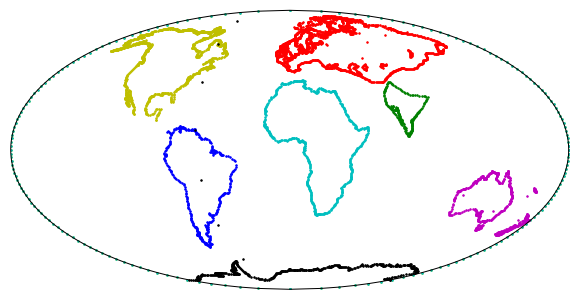

In [41]:
conts=['eur','nam','af','sam','ind','aus','ant'] # set up a list
plt.figure(1,(10,10))
cnt=0
syms=['r.','y.','c.','b.','g.','m.','k.'] # symbols for continents
Opts = {'latmin': -90, 'latmax': 90, 'lonmin': 0., 'lonmax': 360.,  \
            'lon_0': 10,'proj': 'moll', 'sym': 'r.', 'symsize': 3,\
            'pltgrid': False, 'res': 'c', 'boundinglat': 0.}
for cont in conts:
    Opts['sym']=syms[cnt] # set line color
    cnt+=1 # increment symbol
    cont_pts=continent.get_continent(cont).transpose()  # get the continent points
    #rotpol=frp.get_pole(cont,10) # get the rotation pole to fixed africa
    #rot_pts=pmag.pt_rot(rotpol,cont_pts[0],cont_pts[1])
    rot_pts=cont_pts
    if has_cartopy:
        pmagplotlib.plot_map(1,rot_pts[0],rot_pts[1],Opts)
    elif has_basemap:
        pmagplotlib.plot_map_basemap(1,rot_pts[0],rot_pts[1],Opts)

Well, it is okay...  But we really should be using GPlates, which is beautiful and very functional, but for the purpose of learning about these things, this approach is fine.